In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
import os
import random

time: 950 ms (started: 2022-06-24 04:41:25 +00:00)


# Create Portfolio

out of 505 companies, 150 firms are randomly selected for the portfolio.

In [2]:
df = pd.read_csv("./stock08_price.csv")
universe = list(df.columns.values[1:])
universe.remove("SP500")
print(universe)

['EXR', 'RCL', 'CLX', 'NSC', 'CXO', 'AKAM', 'WM', 'EBAY', 'GIS', 'MMC', 'PBCT', 'RE', 'MAT', 'DISH', 'UTX', 'TROW', 'MKC', 'NTRS', 'BXP', 'DUK', 'ED', 'AFL', 'RMD', 'PG', 'AME', 'AOS', 'MOS', 'EQR', 'PPL', 'FAST', 'SYK', 'URI', 'PCAR', 'ADS', 'HRL', 'HIG', 'DVN', 'SHW', 'SIVB', 'PVH', 'TXN', 'PNR', 'KLAC', 'AMGN', 'FMC', 'HST', 'INCY', 'CCI', 'LUK', 'CDNS', 'CTAS', 'UNM', 'RF', 'STZ', 'PH', 'SRE', 'AMAT', 'COL', 'MRK', 'MA', 'ARE', 'CI', 'ESS', 'SJM', 'CRM', 'MYL', 'ACN', 'SBAC', 'TMK', 'BBT', 'XOM', 'PRGO', 'GILD', 'IR', 'VAR', 'MAC', 'FLIR', 'EIX', 'NOC', 'AGN', 'MCHP', 'MLM', 'SRCL', 'DISCA', 'LOW', 'CELG', 'LNT', 'IPG', 'DHR', 'HON', 'IP', 'KMX', 'EQT', 'MDT', 'OMC', 'MON', 'NUE', 'IBM', 'FLS', 'LLL', 'PRU', 'TGT', 'APD', 'CTL', 'TJX', 'ILMN', 'XRAY', 'NRG', 'KEY', 'ATVI', 'D', 'SYY', 'TSCO', 'ROST', 'SNPS', 'CMA', 'SNA', 'DFS', 'AAPL', 'FDX', 'EOG', 'ARNC', 'BF', 'HRB', 'DLR', 'KO', 'BRK', 'TIF', 'WHR', 'MU', 'MO', 'HAL', 'APH', 'JCI', 'MTB', 'STT', 'NBL', 'RHT', 'PNW', 'DRI', 'IS

In [3]:
# train data
portfolio_train = ['CELG', 'PXD', 'WAT', 'LH', 'AMGN', 'AOS', 'EFX', 'CRM', 'NEM', 'JNPR', 'LB', 'CTAS', 'MAT', 'MDLZ', 'VLO', 'APH', 'ADM', 'MLM', 'BK', 'NOV', 'BDX', 'RRC', 'IVZ', 'ED', 'SBUX', 'GRMN', 'CI', 'ZION', 'COO', 'TIF', 'RHT', 'FDX', 'LLL', 'GLW', 'GPN', 'IPGP', 'GPC', 'HPQ', 'ADI', 'AMG', 'MTB', 'YUM', 'SYK', 'KMX', 'AME', 'AAP', 'DAL', 'A', 'MON', 'BRK', 'BMY', 'KMB', 'JPM', 'CCI', 'AET', 'DLTR', 'MGM', 'FL', 'HD', 'CLX', 'OKE', 'UPS', 'WMB', 'IFF', 'CMS', 'ARNC', 'VIAB', 'MMC', 'REG', 'ES', 'ITW', 'NDAQ', 'AIZ', 'VRTX', 'CTL', 'QCOM', 'MSI', 'NKTR', 'AMAT', 'BWA', 'ESRX', 'TXT', 'EXR', 'VNO', 'BBT', 'WDC', 'UAL', 'PVH', 'NOC', 'PCAR', 'NSC', 'UAA', 'FFIV', 'PHM', 'LUV', 'HUM', 'SPG', 'SJM', 'ABT', 'CMG', 'ALK', 'ULTA', 'TMK', 'TAP', 'SCG', 'CAT', 'TMO', 'AES', 'MRK', 'RMD', 'MKC', 'WU', 'ACN', 'HIG', 'TEL', 'DE', 'ATVI', 'O', 'UNM', 'VMC', 'ETFC', 'CMA', 'NRG', 'RHI', 'RE', 'FMC', 'MU', 'CB', 'LNT', 'GE', 'CBS', 'ALGN', 'SNA', 'LLY', 'LEN', 'MAA', 'OMC', 'F', 'APA', 'CDNS', 'SLG', 'HP', 'XLNX', 'SHW', 'AFL', 'STT', 'PAYX', 'AIG', 'FOX', 'MA']
# all data
portfolio_all = universe
# all data - train data
portfolio_other = [p for p in universe if p not in portfolio_train]
print(len(portfolio_train), len(portfolio_all), len(portfolio_other))

150 445 295
time: 1.67 ms (started: 2022-06-24 04:41:26 +00:00)


# Prepare the Data

In [6]:
def rolling_corr(item1,item2) :
    #import data
    stock_price_df = pd.read_csv("./stock08_price.csv")
    pd.to_datetime(stock_price_df['Date'], format='%Y-%m-%d')
    stock_price_df = stock_price_df.set_index(pd.DatetimeIndex(stock_price_df['Date']))
    
    #calculate
    df_pair = pd.concat([stock_price_df[item1], stock_price_df[item2]], axis=1)
    df_corr = df_pair[item1].rolling(window=100).corr(df_pair[item2])
    return df_corr


def gen_data(portfolio, file_name="", save_file=False):
    index_list = []
    for _ in range(100):
        indices = []
        for k in range(_, 2420,100):
            indices.append(k)
        index_list.append(indices)

    data_matrix = []
    count = 0
    for i in range(len(portfolio)):
        for j in range(len(portfolio)-1-i):
            a = portfolio[i]
            b = portfolio[len(portfolio)-1-j]
            file_name = a + '_' + b

            corr_series = rolling_corr(a, b)[99:]
            for _ in range(100):
                corr_strided = list(corr_series[index_list[_]][:24]).copy()
                data_matrix.append(corr_strided)
                count+=1
                if count % 100000 == 0 :
                    print(str(count)+' items preprocessed')

    data_matrix = np.transpose(data_matrix)
    data_dictionary = {}
    for i in range(len(data_matrix)):
        data_dictionary[str(i)] = data_matrix[i]
    data_df = pd.DataFrame(data_dictionary)
    if save_file:
        data_df.to_csv(f'./stock_correlation_prediction/{file_name}')
        
    return data_df


def gen_corr_series(data_df=None, file_name="", from_file=False):
    if from_file:
        data_df = pd.read_csv(f'./stock_correlation_prediction/{file_name}')
        data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]
    ind_range = int(len(data_df)/20)
    num_list = []
    for i in range(24):
        num_list.append(str(i))
    data_df = data_df[num_list].copy()
    data_df = np.transpose(data_df)
    indices = [20*k for k in range(ind_range)]
    data_df = pd.DataFrame(data_df[indices])
    return data_df.values.reshape(-1,)



time: 1.43 ms (started: 2022-06-24 04:42:15 +00:00)


In [8]:
#train_data_df = gen_data(portfolio_train, "train_dataset.csv", True) 
#all_data_df = gen_data(portfolio_all, "445_dataset.csv", True) 
#other_data_df = gen_data(portfolio_other, "295_dataset.csv", True) 
gen_from_file = False

if gen_from_file:
    train_corr_series = gen_corr_series(None, "train_dataset.csv", True)
    all_corr_series = gen_corr_series(None, "445_dataset.csv", True)
    other_corr_series = gen_corr_series(None, "295_dataset.csv", True)
else:
    train_data_df = gen_data(portfolio_train) 
    all_data_df = gen_data(portfolio_all) 
    other_data_df = gen_data(portfolio_other) 
    train_corr_series = gen_corr_series(train_data_df)
    all_corr_series = gen_corr_series(all_data_df)
    other_corr_series = gen_corr_series(other_data_df)


FileNotFoundError: [Errno 2] No such file or directory: './stock_correlation_prediction/train_dataset.csv'

time: 11 ms (started: 2022-06-24 04:42:53 +00:00)


In [143]:
display(train_data_df.shape, train_data_df)
display(all_data_df.shape, all_data_df)
display(other_data_df.shape, other_data_df)
display(train_corr_series.shape, train_corr_series)
display(all_corr_series.shape, all_corr_series)
display(other_corr_series.shape, other_corr_series)

(1117500, 24)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.646860,0.129343,0.076145,0.380201,0.304520,0.135613,0.645965,-0.263715,0.841178,0.513100,...,0.814759,0.875386,0.188668,0.819586,0.197392,0.154013,0.619786,0.438184,0.425665,0.089948
1,0.661720,0.169662,0.055064,0.446691,0.360146,0.177422,0.659689,-0.270898,0.836684,0.516596,...,0.816353,0.875038,0.158809,0.816961,0.251993,0.146321,0.604734,0.439219,0.428416,0.114751
2,0.659155,0.215704,0.038396,0.499365,0.406218,0.209112,0.670485,-0.275730,0.831064,0.524429,...,0.818199,0.874943,0.130307,0.814366,0.305329,0.145467,0.589208,0.438152,0.427988,0.141207
3,0.654739,0.259924,0.023849,0.538126,0.431818,0.251470,0.680184,-0.280635,0.821048,0.528980,...,0.820245,0.873563,0.096353,0.809923,0.328261,0.151845,0.577272,0.425757,0.421689,0.168991
4,0.650966,0.307126,0.009120,0.570946,0.457793,0.304160,0.689554,-0.279965,0.807265,0.528812,...,0.826255,0.872339,0.035515,0.802445,0.353126,0.148253,0.561113,0.417401,0.416765,0.190501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117495,0.866739,0.167529,0.658393,0.833564,0.402520,0.383945,0.402393,-0.269347,0.714217,0.556693,...,0.571640,0.220059,0.693492,-0.260261,0.701061,0.741110,-0.233114,0.801676,-0.828900,-0.168297
1117496,0.879261,0.155961,0.650015,0.832456,0.399411,0.344749,0.385970,-0.279143,0.727370,0.553408,...,0.570812,0.215645,0.686535,-0.254913,0.713698,0.742595,-0.272987,0.798887,-0.837504,-0.118965
1117497,0.891256,0.156386,0.632240,0.833718,0.394626,0.352886,0.371146,-0.298738,0.735614,0.549293,...,0.572000,0.189321,0.684560,-0.251550,0.727093,0.741244,-0.309640,0.798944,-0.840973,-0.062133
1117498,0.899225,0.123398,0.612947,0.837684,0.387205,0.366133,0.364079,-0.318565,0.740142,0.541375,...,0.576797,0.161096,0.682970,-0.240967,0.741298,0.741863,-0.347815,0.801659,-0.840659,-0.013692


(9879000, 24)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.497774,0.867078,0.929886,0.798737,0.916905,0.821606,0.455319,0.898608,-0.171098,0.698337,...,0.161299,0.791313,0.297725,0.805376,0.557532,0.329460,0.229645,0.763200,0.060050,-0.070328
1,0.508157,0.879019,0.931216,0.795518,0.919031,0.813764,0.446807,0.900136,-0.162462,0.726055,...,0.139552,0.787143,0.284440,0.804717,0.564313,0.362412,0.269066,0.777236,0.116921,-0.067952
2,0.519519,0.886635,0.931574,0.789497,0.919333,0.805922,0.453463,0.902667,-0.157053,0.754312,...,0.120584,0.782266,0.256521,0.808676,0.574916,0.385395,0.301168,0.787881,0.177850,-0.071872
3,0.525212,0.885117,0.931529,0.781680,0.919080,0.798574,0.455208,0.904554,-0.151704,0.780433,...,0.103008,0.777531,0.219648,0.813125,0.586749,0.411166,0.333245,0.795706,0.241624,-0.079857
4,0.531054,0.889197,0.930634,0.779350,0.920531,0.790839,0.452805,0.904758,-0.137119,0.801920,...,0.084900,0.771821,0.175268,0.814598,0.597944,0.446049,0.373026,0.814122,0.293397,-0.088089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9878995,0.665561,0.173663,0.914083,0.946369,0.889325,0.572774,0.065030,-0.102503,0.208289,0.751933,...,0.656248,0.908718,0.780772,-0.339746,0.484307,-0.164500,-0.425154,0.950546,-0.301819,-0.346889
9878996,0.729606,0.234967,0.915380,0.943925,0.889278,0.582244,0.083480,-0.088302,0.153260,0.713676,...,0.687655,0.906147,0.778648,-0.317514,0.508792,-0.133996,-0.404416,0.951034,-0.336864,-0.344572
9878997,0.777689,0.294406,0.914457,0.941004,0.889295,0.587531,0.094868,-0.070503,0.099451,0.666599,...,0.716481,0.904081,0.777185,-0.289595,0.537384,-0.110756,-0.388671,0.951260,-0.375601,-0.344555
9878998,0.794593,0.341947,0.913356,0.937069,0.889360,0.595039,0.110783,-0.052125,0.045326,0.603656,...,0.735293,0.902475,0.778070,-0.237140,0.564536,-0.075715,-0.369266,0.951697,-0.415342,-0.339717


(4336500, 24)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.339356,0.824397,0.837247,0.907204,0.877186,0.951944,0.559898,0.651437,0.801450,0.859929,...,0.878366,0.793700,0.884917,0.650173,0.230017,0.197352,0.671227,0.575144,0.916896,-0.745306
1,-0.365498,0.823882,0.837633,0.905135,0.878197,0.953534,0.572852,0.626353,0.790029,0.845366,...,0.883372,0.782782,0.879674,0.639181,0.261948,0.228399,0.652064,0.545945,0.917144,-0.753174
2,-0.386293,0.822486,0.838095,0.901945,0.877335,0.954299,0.587292,0.609553,0.784991,0.822991,...,0.888335,0.769093,0.875540,0.630612,0.291039,0.259194,0.631626,0.528320,0.917113,-0.759628
3,-0.396729,0.820089,0.831821,0.898469,0.876674,0.956812,0.601266,0.591821,0.781472,0.797211,...,0.893857,0.762470,0.873005,0.625454,0.315264,0.298871,0.612473,0.500803,0.917009,-0.769781
4,-0.405088,0.821535,0.828989,0.897016,0.878741,0.959973,0.615721,0.572827,0.792092,0.776480,...,0.898717,0.755984,0.869862,0.618681,0.336843,0.347793,0.585150,0.483442,0.917152,-0.775932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336495,0.665561,0.173663,0.914083,0.946369,0.889325,0.572774,0.065030,-0.102503,0.208289,0.751933,...,0.656248,0.908718,0.780772,-0.339746,0.484307,-0.164500,-0.425154,0.950546,-0.301819,-0.346889
4336496,0.729606,0.234967,0.915380,0.943925,0.889278,0.582244,0.083480,-0.088302,0.153260,0.713676,...,0.687655,0.906147,0.778648,-0.317514,0.508792,-0.133996,-0.404416,0.951034,-0.336864,-0.344572
4336497,0.777689,0.294406,0.914457,0.941004,0.889295,0.587531,0.094868,-0.070503,0.099451,0.666599,...,0.716481,0.904081,0.777185,-0.289595,0.537384,-0.110756,-0.388671,0.951260,-0.375601,-0.344555
4336498,0.794593,0.341947,0.913356,0.937069,0.889360,0.595039,0.110783,-0.052125,0.045326,0.603656,...,0.735293,0.902475,0.778070,-0.237140,0.564536,-0.075715,-0.369266,0.951697,-0.415342,-0.339717


(1341000,)

array([ 0.64686041,  0.51820911,  0.26509852, ..., -0.53164748,
       -0.48467624, -0.72861306])

(11854800,)

array([ 0.49777406,  0.23529682,  0.44683713, ..., -0.43884455,
       -0.61089478, -0.40945352])

(5203800,)

array([-0.33935619, -0.42858279,  0.21048828, ..., -0.43884455,
       -0.61089478, -0.40945352])

time: 476 ms (started: 2022-06-22 10:06:50 +00:00)


# plot correlation coffecient distribution of data

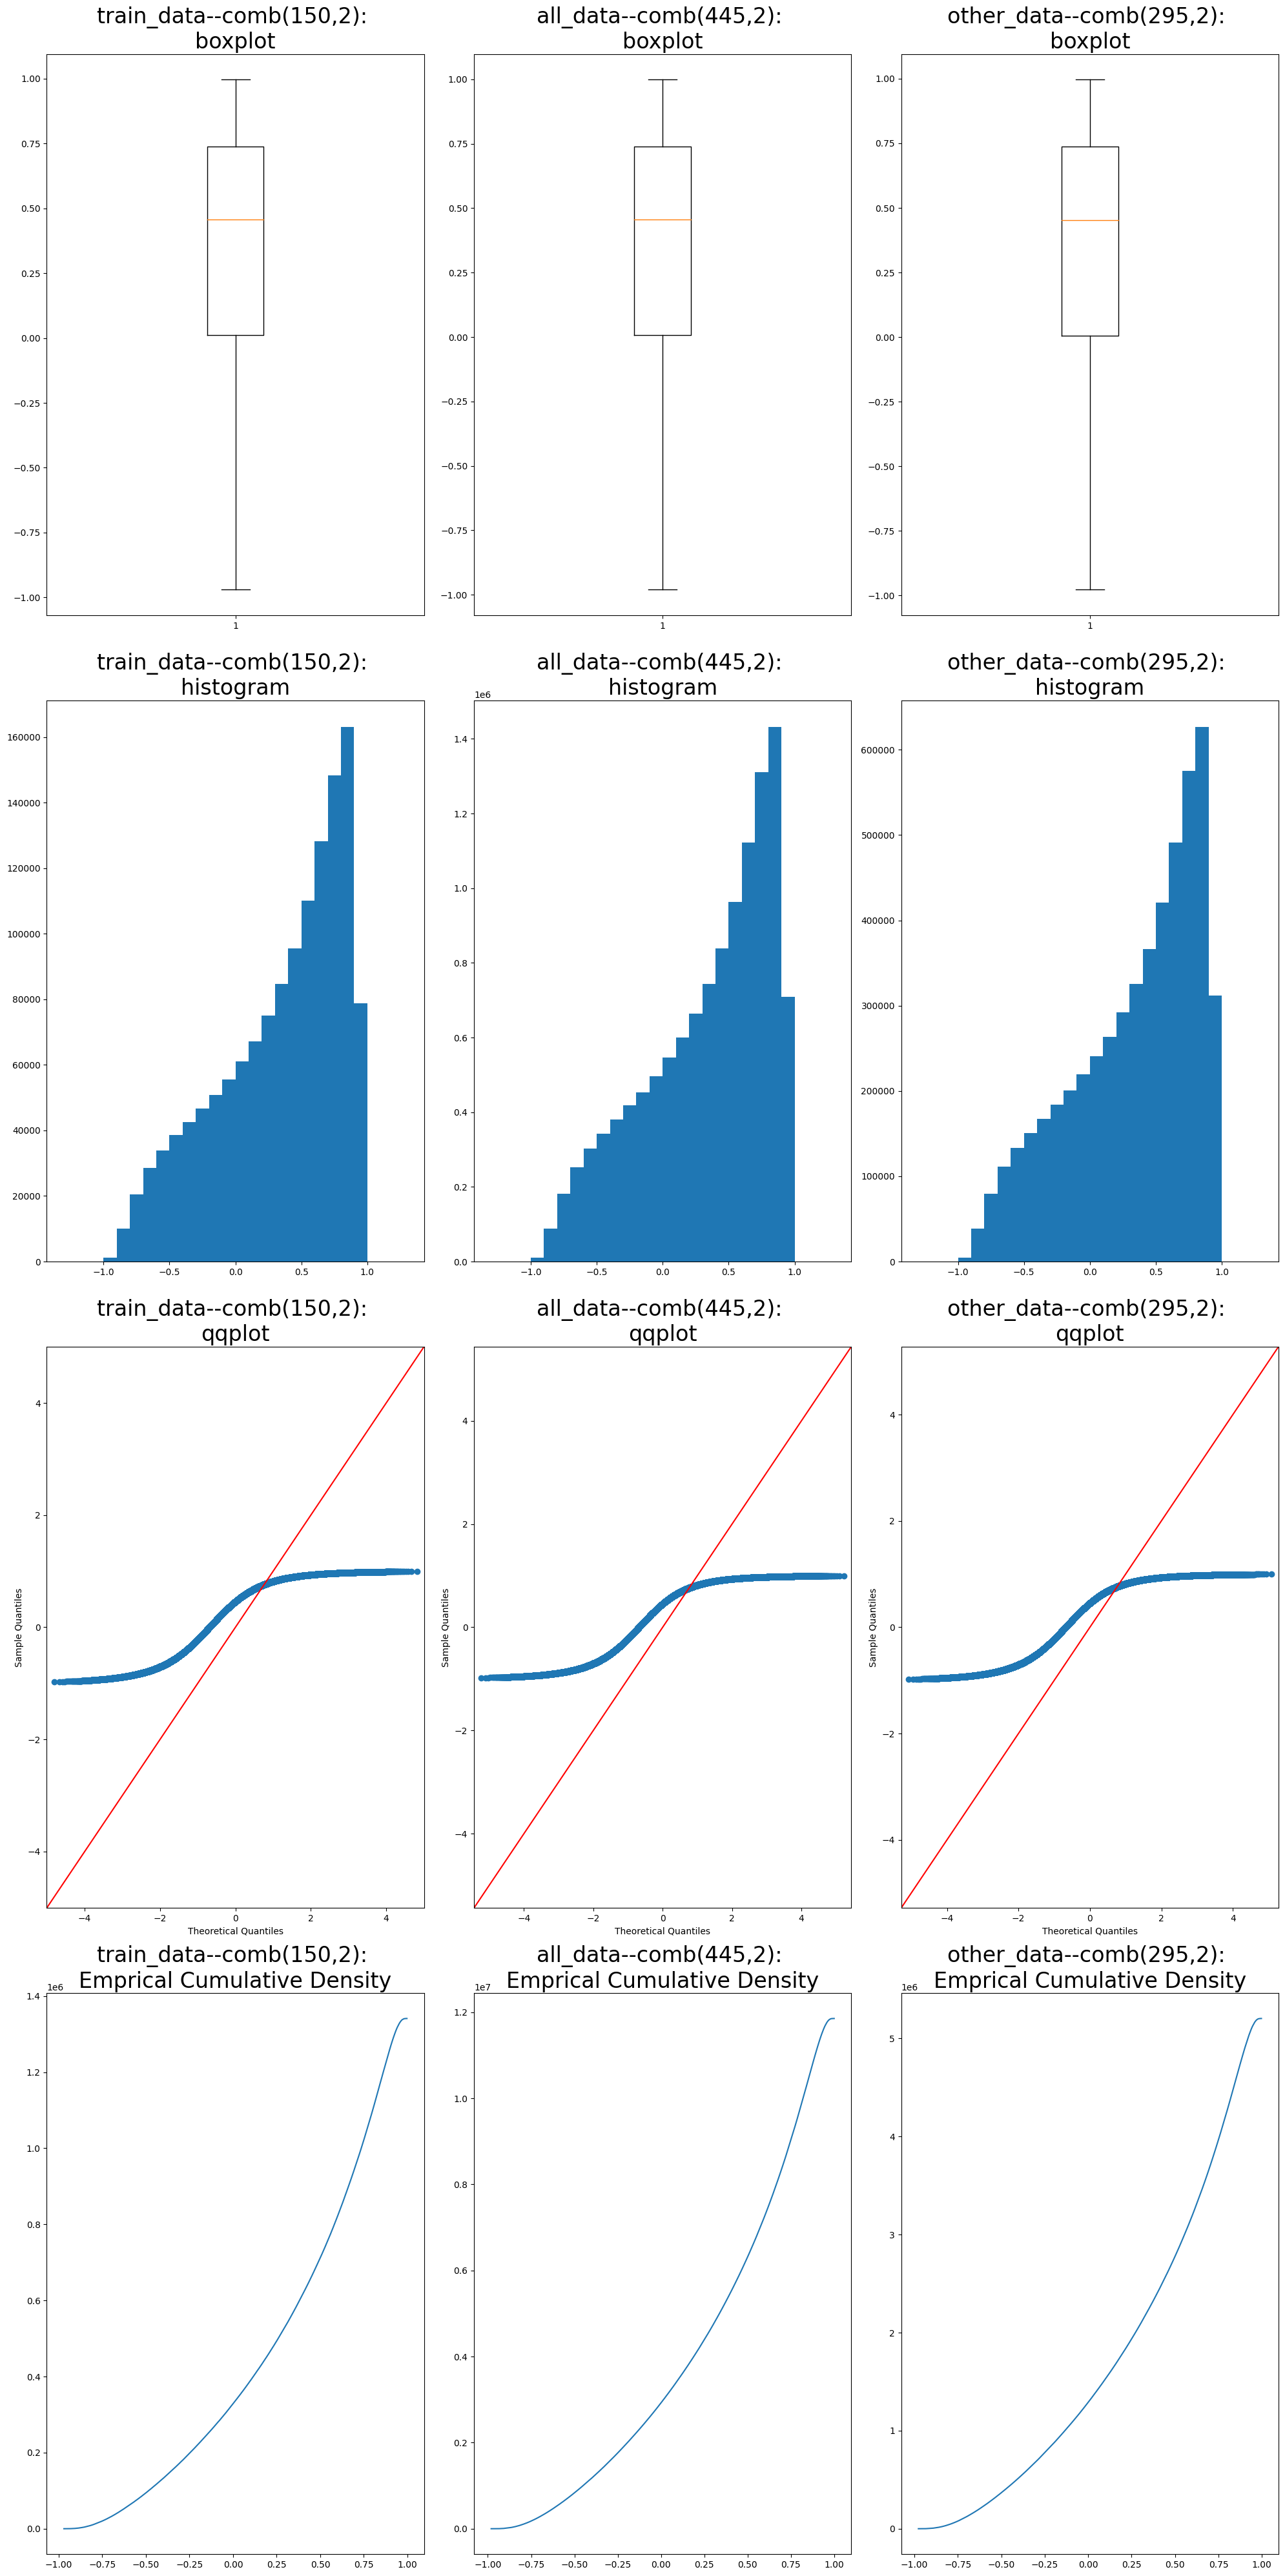

time: 38.4 s (started: 2022-06-23 14:30:16 +00:00)


In [154]:
datasets = {'train_data--comb(150,2)': train_corr_series, 'all_data--comb(445,2)': all_corr_series, 'other_data--comb(295,2)': other_corr_series}
etl_types = ["boxplot", "histogram", "qqplot", "Emprical Cumulative Density"]
fig, axes = plt.subplots(figsize=(20, 40),nrows=len(etl_types), ncols=len(datasets), sharex=False, sharey=False, dpi=100)

for row, etl_type in enumerate(etl_types):
    for col,dataset_key in enumerate(datasets):
        # print(row, etl_type, col, dataset_key, datasets[dataset_key])
        s = axes[row, col]
        s.set_title(f"{dataset_key}: \n{etl_type}", fontsize=24)
        if etl_type=="boxplot":
            s.boxplot(datasets[dataset_key])
        elif etl_type=="histogram":
            s.hist(datasets[dataset_key], bins=[b/10 for b in range(-13,14)])
        elif etl_type=="qqplot":
            sm.qqplot(datasets[dataset_key], line='45', ax=s)
        elif etl_type=="Emprical Cumulative Density":
            pd.Series(datasets[dataset_key]).value_counts().sort_index().cumsum().plot(ax=s)

# 分開, 避免子圖標籤互相重疊
plt.tight_layout()
plt.show()
plt.close()

[(0.47, 0.475)]

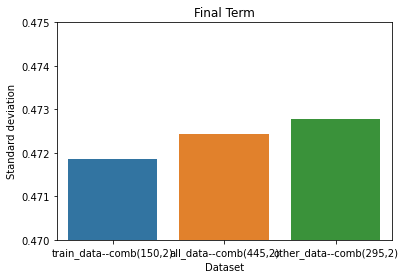

time: 86.9 ms (started: 2022-06-23 15:21:27 +00:00)


In [161]:
df = pd.DataFrame([[dataset_key, datasets[dataset_key].std()] for dataset_key in datasets], 
                  columns=['Dataset', 'Standard deviation'])
ax = sns.barplot(x='Dataset', y='Standard deviation', data=df)
ax.set_title('Final Term')
ax.set(ylim=[0.47, 0.475])